## HW1
### Reviewing the codes: Likelihood, Prior and Posterior Distributions

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

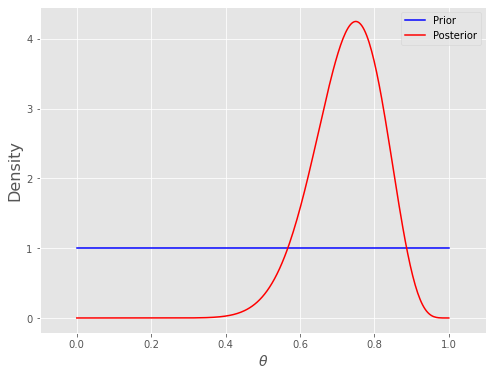

In [3]:
# Likelihood : Product of f(x's given theta)
n = 20
y = 15
# y is sum of x's, where each x is an observed value from ber(theta)

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

# Prior : theta follows Unif(0,1)
a0 = 1
b0 = 1
prior = st.beta(a=a0, b=b0)

# Posterior : theta given y follows Beta(a+y, b+n-y)
post = st.beta(a=a0+y, b=b0+(n-y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

In [4]:
plt.rc('font', size=12)
# grid (theta)
x = np.linspace(0.375, 0.525, 150)

# posterior with data (y,n-y) = (437,543) and uniform prior Beta(1,1)
au = 438
bu = 544

# calculate densities
pdu = st.beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = 437 + ap
bi = 543 + bp
# calculate prior and posterior densities
pdp = st.beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = st.beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

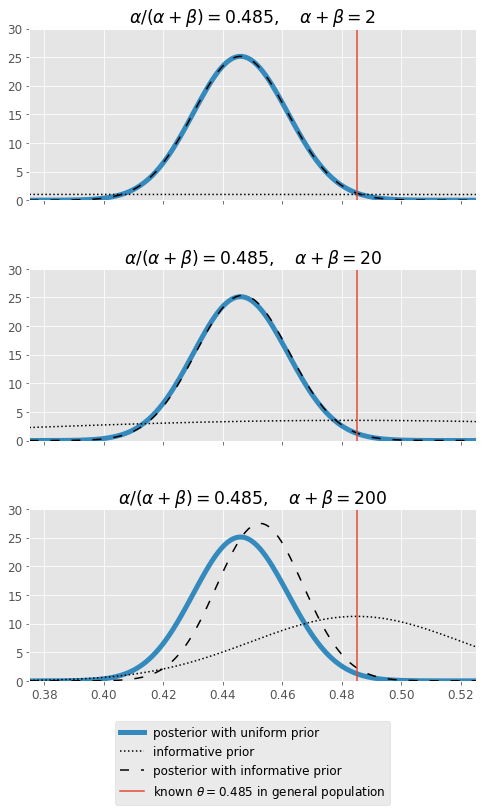

In [5]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))

# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color='C1', linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);

### Adding a Weak Likelihood Model

In [6]:
plt.rc('font', size=12)
# grid (theta)
x = np.linspace(0.375, 0.525, 150)

# !!!!CHANGE POINT!!!! posterior with data (y,n-y) = (44,54) and uniform prior Beta(1,1)
au = 45
bu = 55

# calculate densities
pdu = st.beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = 44 + ap
bi = 55 + bp
# calculate prior and posterior densities
pdp = st.beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = st.beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

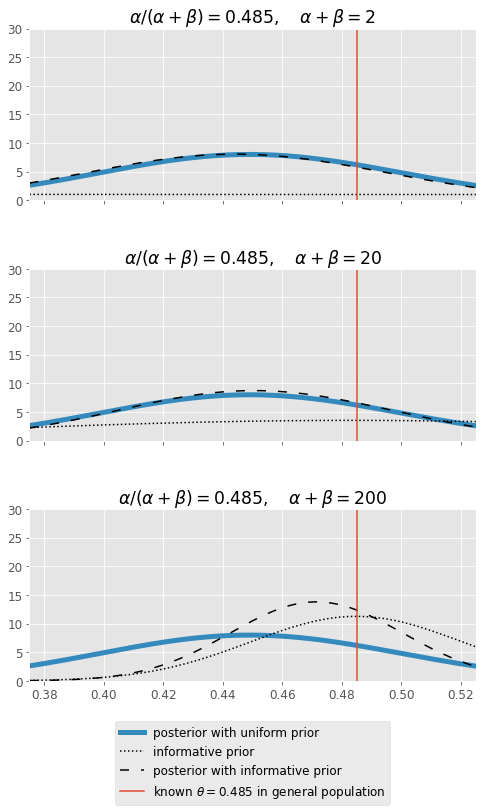

In [7]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))

# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color='C1', linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);

## HW2

### Expected proportion of heterozygotes among brown-eyed children of brown-eyed parents

![](https://raw.githubusercontent.com/YonseiESC/ESC-21SPRING/main/Week1/HW/5%EC%A1%B0/img/HW2_1.JPG)

### Posterior probability that Judy is heterozgote given specific data
![](https://raw.githubusercontent.com/YonseiESC/ESC-21SPRING/main/Week1/HW/5%EC%A1%B0/img/HW2_2.JPG)

### Posterior probability that Judy's first grandchild has blue eyes, given data
![](https://raw.githubusercontent.com/YonseiESC/ESC-21SPRING/main/Week1/HW/5%EC%A1%B0/img/HW2_3.JPG)

## HW3
### Prior Distribution 선택

먼저, 베타분포의 평균이 0.9 일 수 있도록 $\alpha /\beta = 9$ 인 정수해 (반드시 정수일 필요는 없지만 간단한 문제풀이를 위하여) 로 **prior's candidate** 을 만들어 보았다.

여러 베타 분포 후보 중 생존율이 0.8 미만이거나 0.97 초과일 확률을 살펴보았다.

Prior 하에서 생존율이 0.8 미만이거나 0.97 초과일 확률이 0.036 정도면 충분히 낮다고 판단하여 candidate 중에서 $\theta$ ~ $Beta(45,5)$ 을 선택했다.

In [8]:
from scipy.stats import beta

acandi = np.array([0.9 * 10* i for i in range(1, 11)])
bcandi = np.array([0.1 * 10* i for i in range(1, 11)])

upper = 1 - beta.cdf(0.97, acandi, bcandi)
lower = beta.cdf(0.8, acandi, bcandi)

df = pd.DataFrame([acandi, bcandi, upper, lower, upper+lower],).T
df.rename(columns={
    0: 'acandi', 
    1: 'bcandi', 
    2: 'upper', 
    3:'lower',
    4: 'sum'
}, inplace=True)
print(df)

   acandi  bcandi     upper     lower       sum
0     9.0     1.0  0.239769  0.134218  0.373987
1    18.0     2.0  0.109955  0.082866  0.192821
2    27.0     3.0  0.055253  0.052032  0.107285
3    36.0     4.0  0.028924  0.033207  0.062131
4    45.0     5.0  0.015503  0.021449  0.036952
5    54.0     6.0  0.008439  0.013979  0.022419
6    63.0     7.0  0.004645  0.009174  0.013819
7    72.0     8.0  0.002578  0.006054  0.008632
8    81.0     9.0  0.001440  0.004013  0.005452
9    90.0    10.0  0.000808  0.002670  0.003478


### Posterior Distribution 구하기

10번의 수술 후 10명의 환자가 모두 생존한 정보가 추가되었다.

이 때, posterior distribution은 다음과 같이 업데이트 될 것이다.

$\theta | data$ ~ $Beta(\alpha + y,\beta + n-y)$ = $Beta(45+10,  5+10-10)$ = $Beta(55, 5)$



### Preidiction

#### 다음 환자가 생존할 확률 구하기

$Ynew | data$ ~ $Ber($$\frac{\alpha+y}{\alpha+\beta+n})$



다음과 다름에 주의할 것  

$Ynew | \theta$ ~ $Ber(\theta)$  
<br/>


$\therefore Pr(Ynew = 1 | data)$ $=$ $\frac{\alpha+y}{\alpha+\beta+n}$ $=$ $\frac{45+10}{45+5+10}$ $=$ $\frac{55}{60}$ $=$ $0.9166...$  
<br/>  

#### 다음 20명의 환자 중 2명 이상 사망할 확률 구하기

위에서 구한 확률을 활용해, 여사건으로 풀면 된다.

0.5054685